In [5]:
import PIL
from PIL import Image
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import math

## Image Read

In [3]:
BASEDIR = os.getcwd()

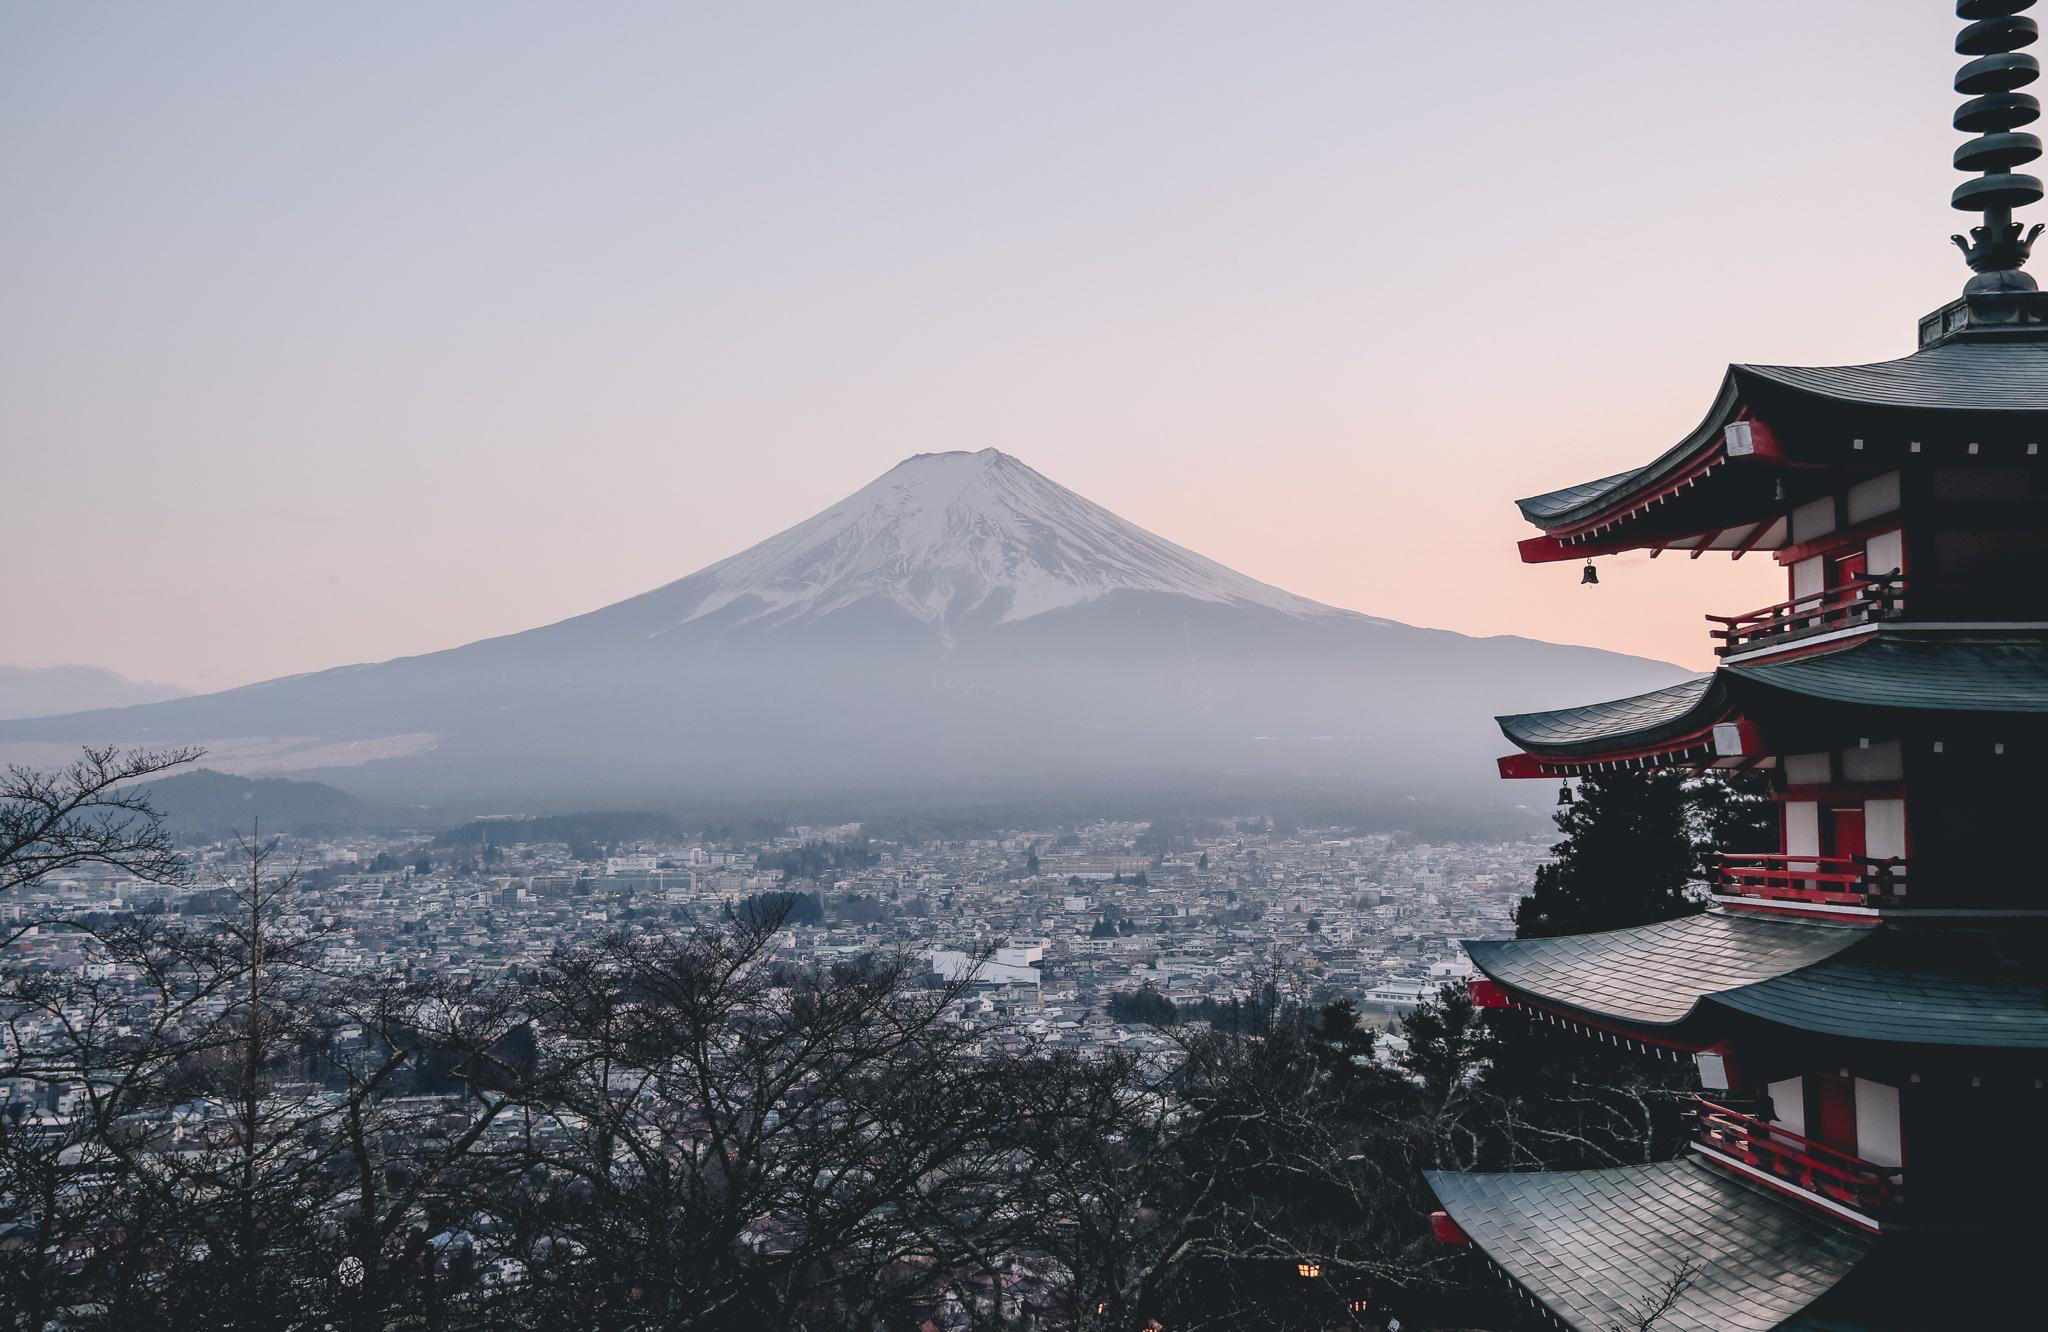

In [301]:
image = Image.open("./wallace.jpg")
image

In [303]:
image_size = image.size # (512,512)
h  = image_size[0]
w  = image_size[1]

In [304]:
image_array = np.array(image)
image_array.shape

(1332, 2048, 3)

<IPython.core.display.Javascript object>


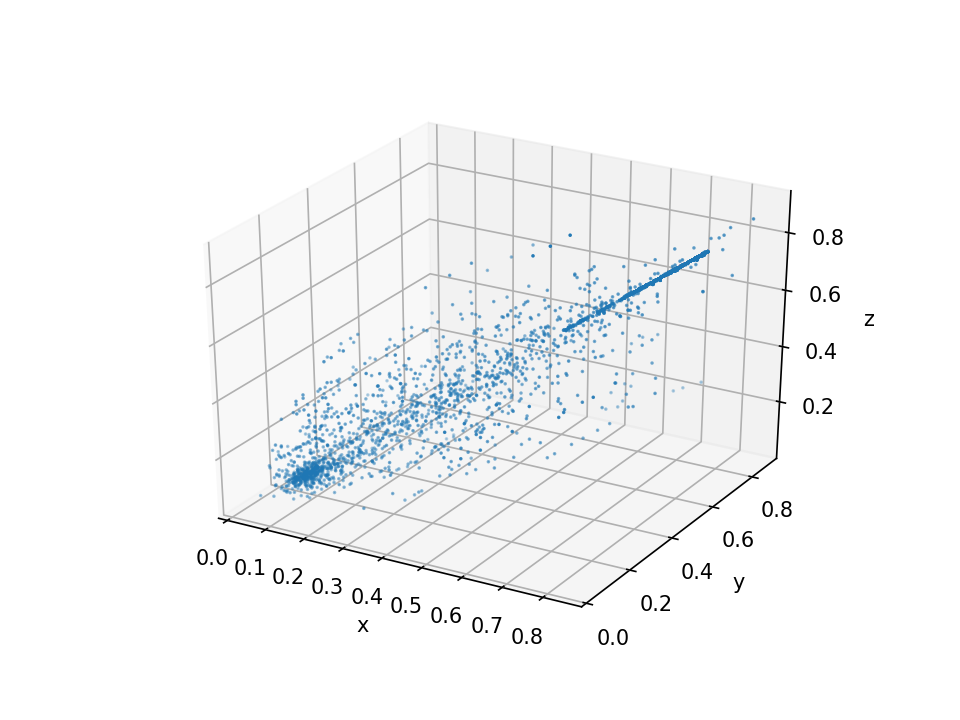

In [306]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(image_array[:,0]/255, image_array[:,1]/255, image_array[:,2]/255, s= 0.5)
plt.show()

In [307]:
image_array.resize(h*w,3) # Made 2D array of (row*col , depth)
image_array.shape

(2727936, 3)

In [308]:
image_array.shape


(2727936, 3)

In [8]:
image_array[0]

array([101, 108,  74], dtype=uint8)

In [9]:
## Kmeans Clustering

In [309]:
class Kmeans_Clustering:
    
    def __init__(self, n_clusters = 16, max_iter=300, tol=0.0001):
        """ n_clusters is no of clusters"""
        self.n_clusters = n_clusters
        self.clusters_centers = None
        self.max_iter = max_iter
        self.tol = tol
        self._labels = None
        self.cost = 1000
        
    def __random_cluster_centroid(self,matrix_data,row): # Private function 
        choice = np.random.randint(0,row,size=self.n_clusters)
        self.clusters_centers = np.zeros((self.n_clusters,3))
        for idx,c in enumerate(choice):
            self.clusters_centers[idx] = matrix_data[c]
#         self.cost = self.__cost(matrix_data)
    def __predict_labels(self,matrix_data):
        """
            Labels Update according to the Centroid.
        """
        distance_point_centroid = np.sqrt(((matrix_data[:,:,None] - self.clusters_centers.T[None,:,:])**2).sum(axis=1))
        self._labels = np.argmin(distance_point_centroid,axis=1)
                    
    def __update_centroid(self,matrix_data):
        """
            Centroid Update according to the Labels.
        """
        for cid in range(self.n_clusters):
            cluster_member_idx = np.where(self._labels==cid)[0]
            if len(cluster_member_idx)==0:
                self.clusters_centers[cid] = np.array([0,0,0])
            else:
                self.clusters_centers[cid] = np.mean(matrix_data[cluster_member_idx],axis=0)
        
    def __cost(self,matrix_data):
        centroid_idx_value = self.clusters_centers[self._labels]
        rse = np.sqrt(((matrix_data - centroid_idx_value)**2).sum(axis=1))
        return rse.mean()
    
    def fit(self,matrix_data):
        """ find cluster centers for the data """
        try:
            if len(matrix_data.shape) != 2:
                print("Data wrong for fit")   
            else:
                print("fitting the data")
                row = matrix_data.shape[0]
                col = matrix_data.shape[1]
                self.__random_cluster_centroid(matrix_data,row)
                self._labels = np.zeros(shape=row)
                
                for go_iter in range(self.max_iter):
                    
                    """
                        Labels Update according to the Centroid.
                    """
                    self.__predict_labels(matrix_data)
                 
                   
                    """
                        Centroid Update according to the Labels.
                    """  
                    self.__update_centroid(matrix_data)
                   
                    """
                        Cost Update
                    """
                    new_cost = self.__cost(matrix_data)
                    print(f"at {go_iter} iteration cost is {new_cost}")
                    if -self.tol <= self.cost - new_cost <= self.tol:
                        break
                    else:
                        self.cost = new_cost
            
            print(f"Done fitting at {go_iter} iteration")
            
        except Exception as err:
            print(err)
                    
    def predict(self,matrix_data):
        """returns labels array for given data"""
        if self.clusters_centers is not None:
            print("predicting cluster id for the data")
            self._labels = np.zeros(shape=row)
            self.__predict_labels(matrix_data)
            print("Done predicting")
        else:
            print("Fitting The given data first before predicting")
            self.fit(matrix_data)
            self.predict(matrix_data)
        return self._labels


In [310]:
k_algo = Kmeans_Clustering(max_iter=50)

In [311]:
# %%timeit 
k_algo.fit(image_array)
print("done")

fitting the data
at 0 iteration cost is 10.157453502634382
at 1 iteration cost is 9.118605954295425
at 2 iteration cost is 8.560938832663163
at 3 iteration cost is 8.367079591370139
at 4 iteration cost is 8.26593811675691
at 5 iteration cost is 8.199475590760402
at 6 iteration cost is 8.139818823171472
at 7 iteration cost is 8.098538371641924
at 8 iteration cost is 8.065061078424101
at 9 iteration cost is 8.035154866836846
at 10 iteration cost is 8.00939266235673
at 11 iteration cost is 7.987643393562395
at 12 iteration cost is 7.973099735331925
at 13 iteration cost is 7.961567269463583
at 14 iteration cost is 7.950268765922946
at 15 iteration cost is 7.937425310718571
at 16 iteration cost is 7.929487001382293
at 17 iteration cost is 7.925186798840986
at 18 iteration cost is 7.920875146444728
at 19 iteration cost is 7.912889829102356
at 20 iteration cost is 7.9052747905397
at 21 iteration cost is 7.898322957152614
at 22 iteration cost is 7.8900502890032564
at 23 iteration cost is 7.886

In [174]:
predictions = k_algo.predict(image_array)

predicting cluster id for the data
Done predicting


In [312]:
k_algo.cost

7.79192791993888

In [313]:
k_algo.clusters_centers

array([[ 28.06486543,  31.43451172,  35.00237138],
       [240.749403  , 211.73704999, 203.20003614],
       [ 45.71045356,  45.95124634,  52.12024534],
       [183.36010232, 184.22607546, 196.68636964],
       [169.87909471, 169.66310091, 181.89377995],
       [117.86013557, 124.53509779, 137.05400458],
       [137.43276364, 141.02839386, 153.37170324],
       [216.31252514, 209.83411597, 217.53301016],
       [153.21352106, 156.46238393, 171.29300056],
       [ 99.75298682, 106.80472533, 118.7203997 ],
       [206.70532981, 202.48351892, 211.91935977],
       [229.80879504, 217.41567706, 220.55090566],
       [ 62.55667564,  66.03015775,  74.01681416],
       [203.0049057 , 191.83255159, 195.43689407],
       [ 81.26382784,  86.72363817,  96.68215709],
       [193.94481079, 195.14300763, 208.17508961]])

In [314]:
only_centroid_value = k_algo.clusters_centers[k_algo._labels]
only_centroid_value

array([[169.87909471, 169.66310091, 181.89377995],
       [169.87909471, 169.66310091, 181.89377995],
       [169.87909471, 169.66310091, 181.89377995],
       ...,
       [ 28.06486543,  31.43451172,  35.00237138],
       [ 28.06486543,  31.43451172,  35.00237138],
       [ 28.06486543,  31.43451172,  35.00237138]])

In [315]:
cluster_image = np.array(only_centroid_value.reshape(w,h,3),dtype=np.uint8)
# cluster_image = cluster_image.astype(np.uint8)
cluster_image

array([[[169, 169, 181],
        [169, 169, 181],
        [169, 169, 181],
        ...,
        [206, 202, 211],
        [206, 202, 211],
        [206, 202, 211]],

       [[169, 169, 181],
        [169, 169, 181],
        [169, 169, 181],
        ...,
        [206, 202, 211],
        [206, 202, 211],
        [206, 202, 211]],

       [[169, 169, 181],
        [169, 169, 181],
        [169, 169, 181],
        ...,
        [206, 202, 211],
        [206, 202, 211],
        [206, 202, 211]],

       ...,

       [[ 45,  45,  52],
        [ 28,  31,  35],
        [ 28,  31,  35],
        ...,
        [ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35]],

       [[ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35],
        ...,
        [ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35]],

       [[ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35],
        ...,
        [ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35]]

In [316]:
compressed_image = Image.fromarray(cluster_image)
compressed_image.save("compressed_wallace.jpeg")

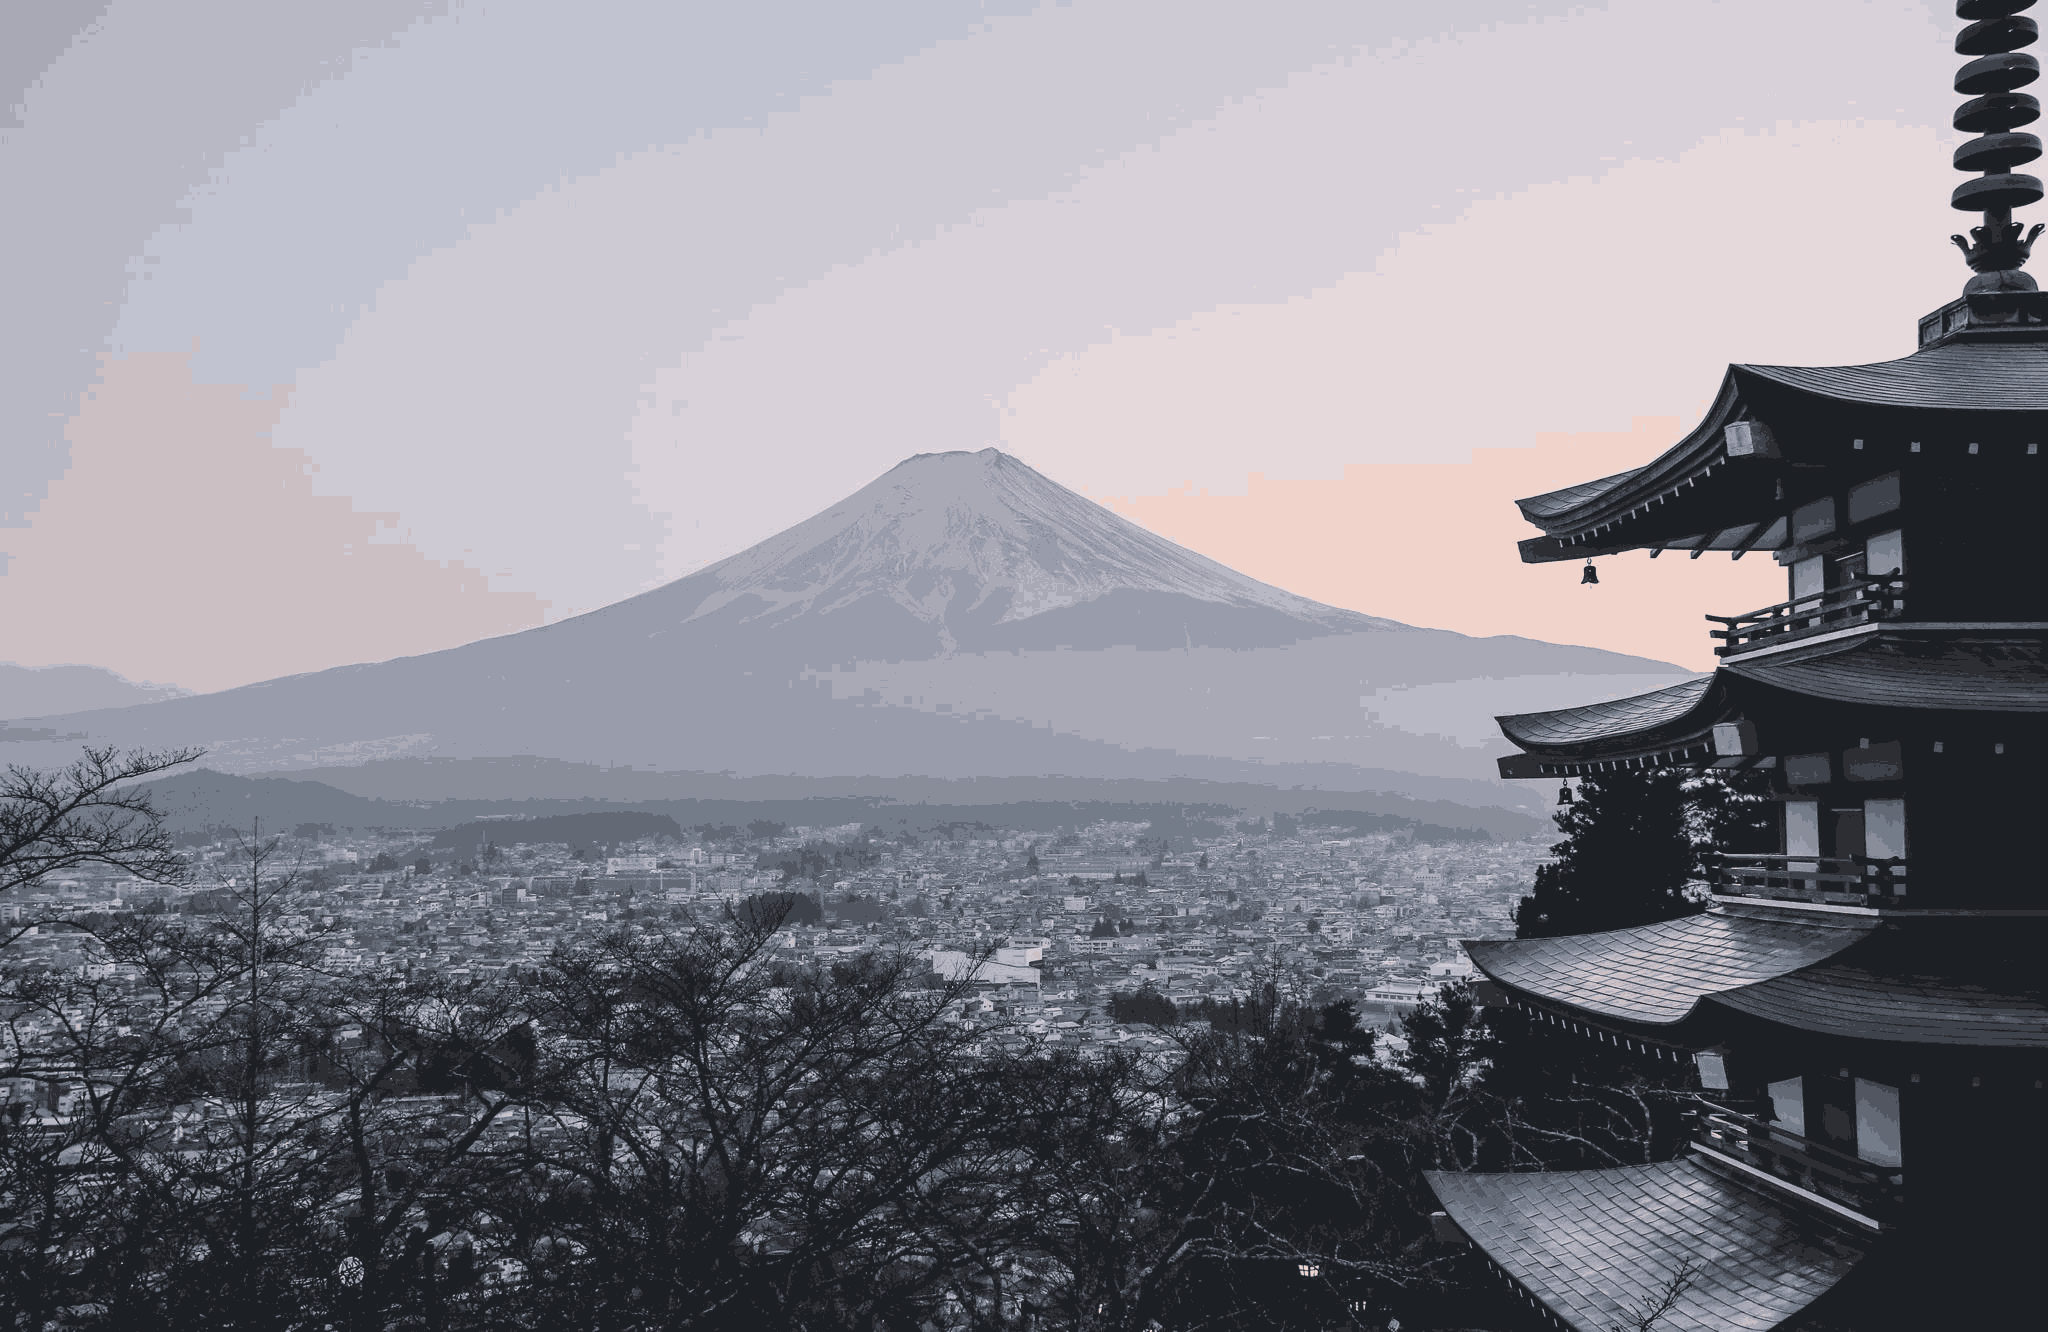

In [317]:
compressed_image